In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns={"CustomerID":"customer_id","Gender":"gender","Age":"age","Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)":"spending_scores"},inplace=True)

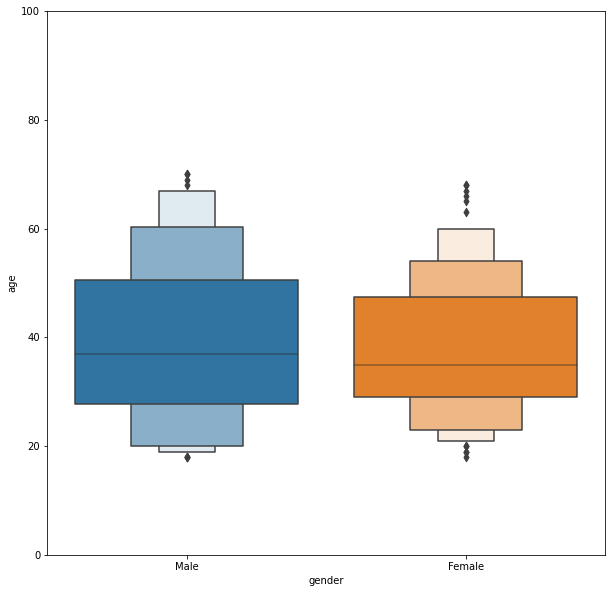

In [5]:
temp = pd.concat([data['age'], data['gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='gender', y="age", data=data)
fig.axis(ymin=0, ymax=100);

<AxesSubplot:xlabel='gender', ylabel='spending_scores'>

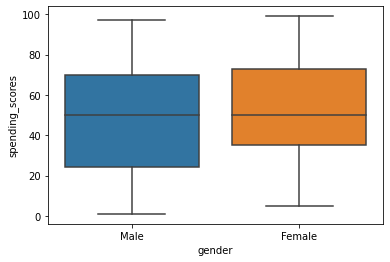

In [6]:
sns.boxplot(x=data['gender'],y=data['spending_scores'])

<AxesSubplot:xlabel='gender', ylabel='annual_income'>

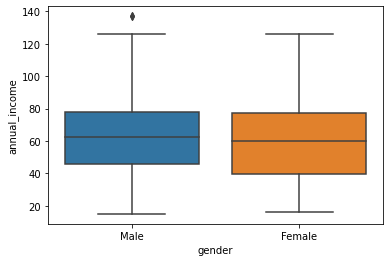

In [7]:
sns.boxplot(x=data['gender'],y=data['annual_income'])

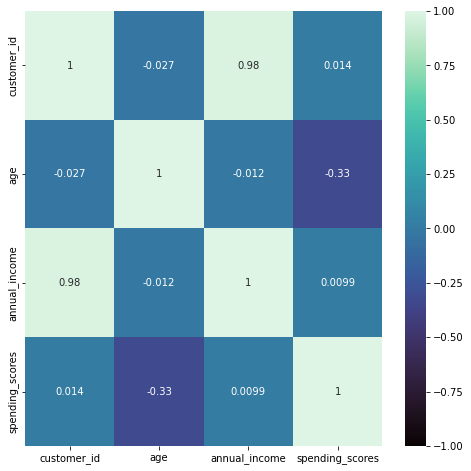

In [8]:
corr=data.corr()
plt.figure(figsize=(8,8))
sn=sns.heatmap(corr,vmin=-1,center=0, annot = True, cmap = 'mako')

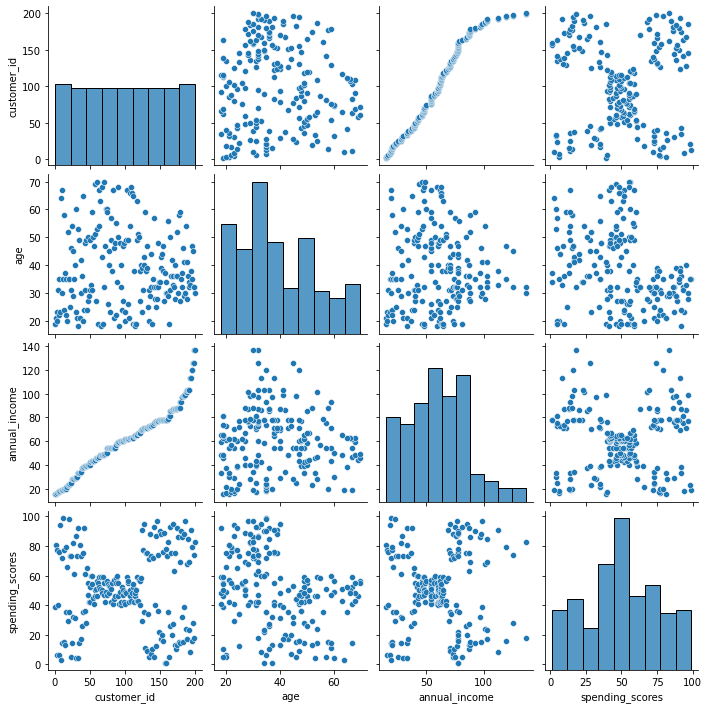

In [9]:
sns.pairplot(data)

In [10]:
data.head(10)

,customer_id,gender,age,annual_income,spending_scores
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
data.shape

(200, 5)

In [12]:
data.describe()

,customer_id,age,annual_income,spending_scores
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      200 non-null    int64 
 1   gender           200 non-null    object
 2   age              200 non-null    int64 
 3   annual_income    200 non-null    int64 
 4   spending_scores  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data[data.duplicated()]

,customer_id,gender,age,annual_income,spending_scores


In [15]:
data.isna().sum()

customer_id        0
gender             0
age                0
annual_income      0
spending_scores    0
dtype: int64

In [16]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9baf6b3610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9baf6b3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9baf6b3280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9baf6bf490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9baf6bf820>],
 'means': []}

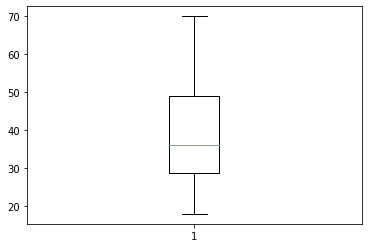

In [17]:
plt.boxplot(data['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9baf77b0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9baf77b7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9baf76ccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9baf77bee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9baf7a22b0>],
 'means': []}

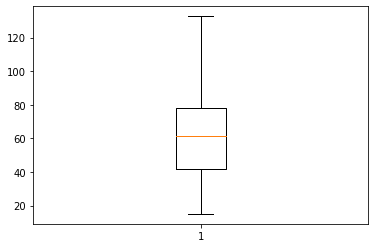

In [18]:
plt.boxplot(data['annual_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bb0259cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bb0267430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bb0259940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9bb0267b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bb0267ee0>],
 'means': []}

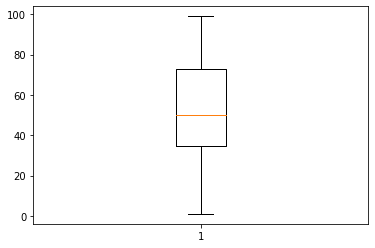

In [19]:
plt.boxplot(data['spending_scores'])

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['gender']=encoder.fit_transform(data['gender'])

In [21]:
data.head()

,customer_id,gender,age,annual_income,spending_scores
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0


In [22]:
from sklearn.cluster import KMeans

In [23]:
data.drop('customer_id',axis=1,inplace=True)

In [24]:
km = KMeans(n_clusters=3, random_state=0)

In [25]:
data['Cluster'] = km.fit_predict(data)

In [26]:
data.head()

,gender,age,annual_income,spending_scores,Cluster
0,1,19.0,15.0,39.0,2
1,1,21.0,15.0,81.0,2
2,0,20.0,16.0,6.0,2
3,0,23.0,16.0,77.0,2
4,0,31.0,17.0,40.0,2


In [27]:
data['Cluster'].value_counts()

2    123
1     39
0     38
Name: Cluster, dtype: int64

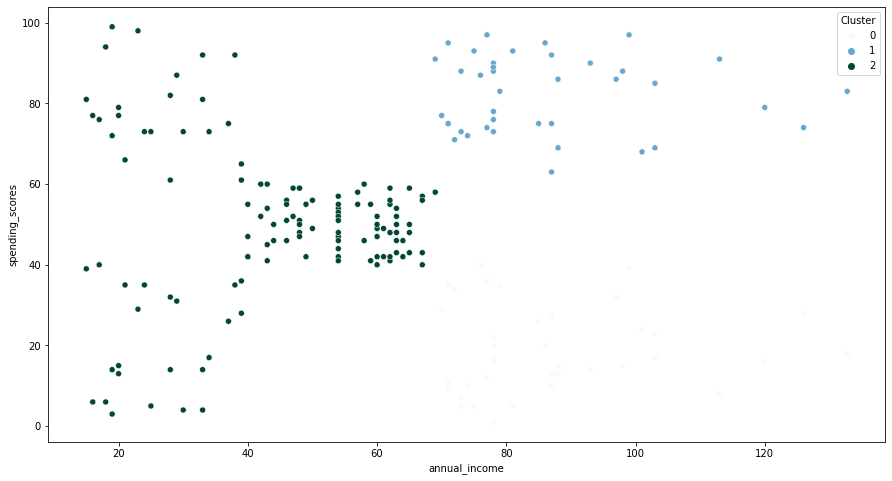

In [28]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data['annual_income'],
                y=data['spending_scores'],
                hue=data['Cluster'],
                palette='PuBuGn')
plt.show()


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
object = StandardScaler()
object.fit_transform(data)

array([[ 1.12815215, -1.42456879, -1.74542941, -0.43480148,  0.7276878 ],
       [ 1.12815215, -1.28103541, -1.74542941,  1.19570407,  0.7276878 ],
       [-0.88640526, -1.3528021 , -1.70708307, -1.71591298,  0.7276878 ],
       [-0.88640526, -1.13750203, -1.70708307,  1.04041783,  0.7276878 ],
       [-0.88640526, -0.56336851, -1.66873673, -0.39597992,  0.7276878 ],
       [-0.88640526, -1.20926872, -1.66873673,  1.00159627,  0.7276878 ],
       [-0.88640526, -0.27630176, -1.6303904 , -1.71591298,  0.7276878 ],
       [-0.88640526, -1.13750203, -1.6303904 ,  1.70038436,  0.7276878 ],
       [ 1.12815215,  1.80493225, -1.59204406, -1.83237767,  0.7276878 ],
       [-0.88640526, -0.6351352 , -1.59204406,  0.84631002,  0.7276878 ],
       [ 1.12815215,  2.02023231, -1.59204406, -1.4053405 ,  0.7276878 ],
       [-0.88640526, -0.27630176, -1.59204406,  1.89449216,  0.7276878 ],
       [-0.88640526,  1.37433211, -1.55369772, -1.36651894,  0.7276878 ],
       [-0.88640526, -1.06573534, -1.5

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(190, 4) (10, 4) (190,) (10,)
